# 単回帰分析
1世帯当たり　年間収入 と 1か月支出

#### データ収集の仕方
家計調査結果，総務省統計局　http://www.stat.go.jp/data/kakei/index.htm    
->“調査の結果”  
->“結果の概要（家計収支編）”  
->過去の結果”の“家計調査年報（家計収支編）”  
->“家計調査年報（総世帯・二人以上の世帯・単身世帯）”の“平成28年（2016年）　年報”  
->“平成28年（2016年）　家計の概要” の“二人以上の世帯”  
->“年間収入五分位・十分位階級別”，ECXELをダウンロード“fn03.xls”  
このExcelファイル, 年間収入十分位階級から，  
年間収入(万円) -> "income"  
消費支出 -> "expenditure" 
エンゲル係数（％） -> "engel"
と表現して，データを作成。

#### 単回帰分析の解放とAPI
statsmodelsが持ちる回帰モデルと仮定する条件　http://www.statsmodels.org/stable/regression.html  
計算はOLSを使用　Ordinary Least Squares　http://www.statsmodels.org/stable/examples/notebooks/generated/ols.html  
OLSのパラメータの与え方が不便と思うならばR風の与え方を可能とする方法　http://www.statsmodels.org/dev/example_formulas.html

In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.formula.api as smf

FLAG_fig = False

In [2]:
url = 'https://sites.google.com/site/datasciencehiro/datasets/FamilyIncome.csv'
df = pd.read_csv(url, comment='#')
df_save = df.copy() # deep copy
print(df)
print(df.shape)
df.corr()

   income  expenditure  engel
0     216       172462   30.8
1     304       204599   29.9
2     356       224776   28.8
3     413       240153   27.8
4     481       255497   27.3
5     555       275490   25.9
6     642       295447   25.7
7     752       323072   24.7
8     902       362769   23.4
9    1461       467616   21.8
(10, 3)


,income,expenditure,engel
income,1.000000,0.993658,-0.939229
expenditure,0.993658,1.000000,-0.969612
engel,-0.939229,-0.969612,1.000000


ols(ordinary least squares、最小2乗)法を用いて単回帰モデルを求める。<br>
https://en.wikipedia.org/wiki/Ordinary_least_squares
データ数 < 20 の場合には、尖度（kurtosis）の評価（olsではkurtosistestと表記）が有効にできないというwarningメッセージが現れるが、ここではこの評価は使わないので無視する。<br>
scipy.stats.kurtosistest https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kurtosistest.html <br>
Kurtosis: https://en.wikipedia.org/wiki/Kurtosis

In [3]:
result = smf.ols('expenditure ~ income', data=df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            expenditure   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     624.7
Date:                Thu, 17 Sep 2020   Prob (F-statistic):           7.02e-09
Time:                        20:52:16   Log-Likelihood:                -105.43
No. Observations:                  10   AIC:                             214.9
Df Residuals:                       8   BIC:                             215.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     1.4e+05   6550.516     21.366      0.0

C:\Users\50810168\Documents\Anaconda\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


$P > |t|$は，係数がゼロである確率，これが非常に小さいならば，ゼロでないといえる。

In [4]:
result.params

Intercept    139956.859032
income          233.856036
dtype: float64

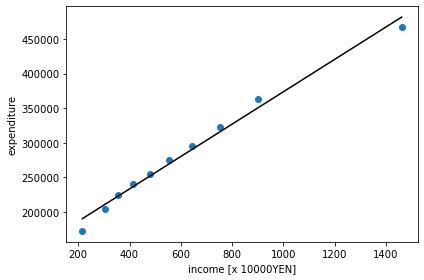

In [5]:
b0, b1 = result.params
plt.plot(df['income'],df['expenditure'], 'o')
plt.plot(df['income'], b0+b1*df['income'], c='k')

plt.xlabel('income [x 10000YEN]')
plt.ylabel('expenditure')

plt.tight_layout()
if FLAG_fig: plt.savefig('REG_Simple_FamilyIncome1.png')
plt.show()

#### 予測

In [6]:
NewData = {'income':[1100,1200]}
df = pd.DataFrame(NewData)
pred = result.predict(df)
pred

0    397198.498402
1    420584.101981
dtype: float64

次は同じことを計算している

In [7]:
pred = b0 + b1*1100
pred

397198.4984021404

上のグラフを見ると，最低収入と最高収入のデータが最も外れているように見えるので，この2点をはずした回帰分析を再度行う。

In [8]:
df1=df_save.copy()

In [9]:
df1.drop(9, inplace=True)
df1.drop(0, inplace=True)

In [10]:
result = smf.ols('expenditure ~ income', data=df1).fit()
result.summary()

C:\Users\50810168\Documents\Anaconda\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            expenditure   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2889.
Date:                Thu, 17 Sep 2020   Prob (F-statistic):           2.78e-09
Time:                        20:52:17   Log-Likelihood:                -73.085
No. Observations:                   8   AIC:                             150.2
Df Residuals:                       6   BIC:                             150.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.314e+05   2784.282     47.195      0.000    1.25e+05    1.38e+05
income       256.6572      4.775     53.754      0.000     244.974     268.340
==============================================================================
Omnibus:                        3.508   Durbin-Watson:                   1.490
Prob(Omnibus):                  0.173   Jarque-Bera (JB):                1.091
Skew:                          -0.903   Prob(JB):                        0.580
Kurtosis:                       3.086   Cond. No.                     1.77e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

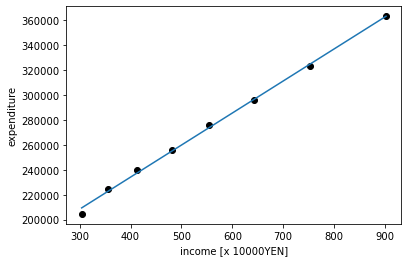

In [11]:
a, b = result.params
plt.plot(df1['income'],df1['expenditure'], 'o', c='k')
plt.plot(df1['income'], a+b*df1['income'])

plt.xlabel('income [x 10000YEN]')
plt.ylabel('expenditure')
plt.show()

In [12]:
result = smf.ols('engel ~ income', data=df1).fit()
result.summary()

C:\Users\50810168\Documents\Anaconda\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  engel   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     152.7
Date:                Thu, 17 Sep 2020   Prob (F-statistic):           1.71e-05
Time:                        20:52:17   Log-Likelihood:                -3.8878
No. Observations:                   8   AIC:                             11.78
Df Residuals:                       6   BIC:                             11.93
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     32.3795      0.488     66.379      0.000      31.186      33.573
income        -0.0103      0.001    -12.358      0.000      -0.012      -0.008
==============================================================================
Omnibus:                        0.613   Durbin-Watson:                   1.212
Prob(Omnibus):                  0.736   Jarque-Bera (JB):                0.090
Skew:                          -0.217   Prob(JB):                        0.956
Kurtosis:                       2.717   Cond. No.                     1.77e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

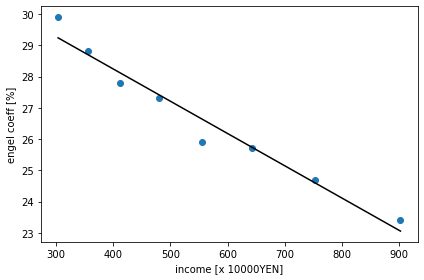

In [13]:
a, b = result.params
plt.plot(df1['income'],df1['engel'], 'o')
plt.plot(df1['income'], a+b*df1['income'], c='k')

plt.xlabel('income [x 10000YEN]')
plt.ylabel('engel coeff [%]')

plt.tight_layout()
if FLAG_fig: plt.savefig('REG_Simple_FamilyIncome2.png')
plt.show()